# <img style="float: left; padding-right: 10px; width: 45px" src="https://upload.wikimedia.org/wikipedia/en/8/89/ExtensionFlag.png"> CSCI E-63 Big Data Analytics

## Final Project Report - Spark CPU vs GPU

**Student Name: Adam Brzozowski**

**Harvard University**<br/>
**Spring 2023**<br/>
**Instructors**: Zoran Djordjevic


<hr style="height:2pt">

# Problem Statement

One of my interests when I started CSCI E-63 this semester was to learn if I could leverage a GPU with Spark. I had recently seen just how powerful even a modest a GPU could be when used for deep learning in terms of speeding up the computation of each epoch, and I began looking for ways to leverage a GPU for more basic data processing tasks as well. The primary purpose of this technology demonstration will be to showcase how easy it is to leverage an NVIDIA GPU with Spark. After spending time reviewing the materials NVIDIA developed for this purpose, I believe a shorter and simpler demonstration will add value on YouTube as well. I hope to show that comparatively small up front incremental configuration tasks provide time savings in excess of watching the technology demo and going through the setup. Demonstrations like this add value by improving the utilization of existing hardware resources. GPUs are probably one of the most under exploited pieces of hardware in a computer from a utilization perspective. Greater workforce awareness of how to leverage a GPU reduces unnecessary retirement of computers and e-waste.

# Introduction

Throughout this workbook, I put Spark through its paces on a 120 million record 12 gb dataset. My primary objective is to see how well an ordinary, older consumer grade GPU can do on this dataset compared to using CPUs. To accomplish this, the workbook will be run twice - once with a CPU runtime and once with a GPU runtime. The total time to run the workbook will be compared in terms of:

(1) data preparation ; \
(2) data visualization / descriptives; and \
(3) a basic machine learning regression on the dependent variable in the dataset \

To get the most out of the data processing work being done, I decided to look at the airline on time performance dataset from Kaggle from a different perspective than most people have used this dataset for. In the news lately, there have been a number of high profile problems with America's transportation system - airline mass cancellations and widespread lateness. Purportedly, these issues are recent and due to supply shocks from Covid19. Is Covid19 really to blame for industry performance issues or are we looking at more of the same? 

In [2]:
from IPython import display

NVIDIA makes some pretty remarkable product claims. Specifically, on their website for Spark RAPIDS, there is a key product claim for doing ETL work that getting Spark to work with a GPU is as simple as invoking the jar file at launch and setting a single configuration. 

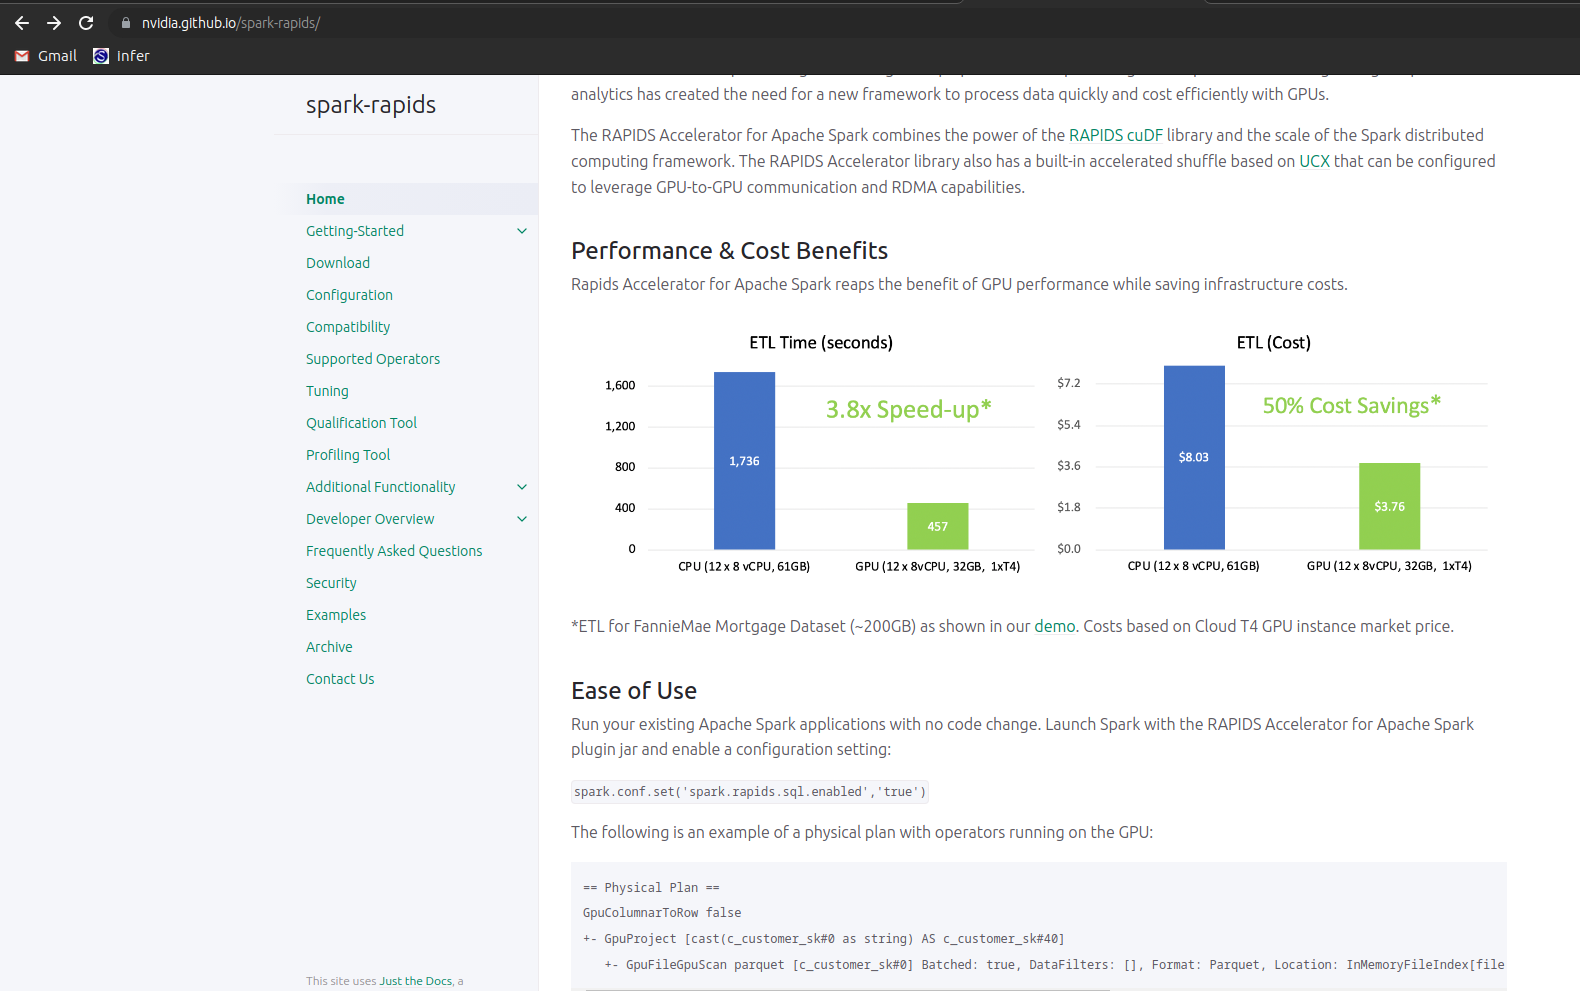

In [3]:
display.Image('nvidia_rapids_product_claims.png')

# Setting up Spark for RAPIDS

RAPIDS is NVIDIA's framework for using Spark with a GPU. To set it up is very simple. The first step is to download the spark-rapids jar file to use with Pyspark. I downloaded that from: https://repo1.maven.org/maven2/com/nvidia/rapids-4-spark_2.12/23.02.0/rapids-4-spark_2.12-23.02.0.jar 

Per the instructions here: https://nvidia.github.io/spark-rapids/docs/download.html

Then start Pyspark with the applicable command to use the jar in the classpath - your filepath will be different depending on where you put those and your username:

pyspark --jars /home/data_guru/classpath/rapids-4-spark_2.12-23.02.0.jar

In the code below, after the initialization of Spark, I tell Spark to use the GPU with this command:

cp_u = False\
if cp_u is False:\
    
    spark.conf.set('spark.rapids.sql.enabled','true')
    
For the baseline study, I simply changed: cp_u = True and started Pyspark with :

Since I only have 4 physical cores, and 4 logical cores, I reserve 1 for other processes to start the program. It's what the computer came with - just like the GPU - so I regard it as a fair comparison.

pyspark --master local[3]

# Updated Spark ML with GPU Libraries

During the course of working on this study, after some weeks of planning, I found an additional library announcement from NVIDIA in an April 2023 release.

https://github.com/NVIDIA/spark-rapids-ml/blob/branch-23.04/python/README.md

The new Spark Rapids ML library from NVIDIA provides significant out of the box functionality that can be used for large scale GPU based computation for a number of functions. Per the NVIDIA web site:

"You can download the Spark RAPIDS ML package from the NVIDIA/spark-rapids-ml GitHub repository under the Apache v2 license. The initial release provides GPU acceleration for the following Spark ML algorithms:

PCA\
K-means clustering\
Linear regression with ridge and elastic net regularization\
Random forest classification and regression"

As I was struggling with how to get a more detailed regression study to work, I found this library. Time permitting, I will incorporate this at the end into an expanded version of this study. For now, suffice to say that it is another option for going further in this direction - which appears to be on the cutting edge of the field.

# Non local runtime options

The purpose of this demo was to identify the difficulty level in using NVIDIA RAPIDS to achieve any sort of low cost performance improvement on a local machine. In some cases, local runtimes are necessary for security or compliance purposes and the cloud is not always an option. However, in the event that you do have a cloud environment to work in on Paperspace and want to give this a try, there are some articles about doing this. It's one of the standard options on Paperspace as well. Here's one article I found - I have not investigated the claims in great detail: https://medium.com/rapids-ai/up-and-running-with-rapids-and-paperspace-gradient-652bdb7bcab0

Here is a toy example that I was going to use to test a working spark rapids environment. I will return to this later: https://github.com/NVIDIA/spark-rapids-ml/blob/branch-23.04/python/README.md

# Python Environment

In addition, I found it expedient to create a brand new python environment just for this project so that I could get a more controlled test of the capabilities of this workbook without any confounding environmental variables. Here is a copy of the yaml create statement for this project.

In [4]:
with open('/home/data_guru/Documents/hes_data_science_program/general_configs/cscie63finalproject.yml','r') as file:
    for line in file:
        print(line)

name: csci_e_63_final_project

channels:

  - nvidia

  - conda-forge

  - default

dependencies:

  - python==3.10

  - numpy

  - matplotlib

  - jupyter

  - seaborn

  - pandas

  - IPython

  - pytorch

  - pip

  - nvidia::cudatoolkit

  - conda-forge::ncurses

  - cupy

  - psutil

  - GPUtil

  - tabulate

  - pyspark

  - nbconvert

  - gcc


# System resources

In order to fulfill a key objective of this demonstration, system hardware resources are presented below in order to demonstrate that this was run on very modest hardware that would be financially within reach of most people. The total cost of the machine plus upgrades over the years was approximately $700 at the time.

For this section, there was a ready code template available here that I was able to use for this purely descriptive type task: https://www.thepythoncode.com/article/get-hardware-system-information-python

In [5]:
import psutil
import platform
from datetime import datetime


def get_size(bytes, suffix="B"):
    """
    Scale bytes to its proper format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor

        
print("="*40, "System Information", "="*40)
uname = platform.uname()
print(f"System: {uname.system}")
print(f"Node Name: {uname.node}")
print(f"Release: {uname.release}")
print(f"Version: {uname.version}")
print(f"Machine: {uname.machine}")
print(f"Processor: {uname.processor}")

# Boot Time
print("="*40, "Boot Time", "="*40)
boot_time_timestamp = psutil.boot_time()
bt = datetime.fromtimestamp(boot_time_timestamp)
print(f"Boot Time: {bt.year}/{bt.month}/{bt.day} {bt.hour}:{bt.minute}:{bt.second}")

# let's print CPU information
print("="*40, "CPU Info", "="*40)
# number of cores
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))
# CPU frequencies
cpufreq = psutil.cpu_freq()
print(f"Max Frequency: {cpufreq.max:.2f}Mhz")
print(f"Min Frequency: {cpufreq.min:.2f}Mhz")
print(f"Current Frequency: {cpufreq.current:.2f}Mhz")
# CPU usage
print("CPU Usage Per Core:")
for i, percentage in enumerate(psutil.cpu_percent(percpu=True, interval=1)):
    print(f"Core {i}: {percentage}%")
print(f"Total CPU Usage: {psutil.cpu_percent()}%")


======================================== System Information ========================================
System: Linux
Node Name: deeplearningcomputer
Release: 6.2.0-20-generic
Version: #20-Ubuntu SMP PREEMPT_DYNAMIC Thu Apr  6 07:48:48 UTC 2023
Machine: x86_64
Processor: x86_64
======================================== Boot Time ========================================
Boot Time: 2023/4/23 14:9:47
======================================== CPU Info ========================================
Physical cores: 4
Total cores: 4
Max Frequency: 3100.00Mhz
Min Frequency: 1550.00Mhz
Current Frequency: 1470.90Mhz
CPU Usage Per Core:
Core 0: 10.0%
Core 1: 5.9%
Core 2: 6.1%
Core 3: 4.0%
Total CPU Usage: 28.1%


In [6]:
# Memory Information
print("="*40, "Memory Information", "="*40)
# get the memory details
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}")
print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}")
print(f"Percentage: {svmem.percent}%")
print("="*20, "SWAP", "="*20)
# get the swap memory details (if exists)
swap = psutil.swap_memory()
print(f"Total: {get_size(swap.total)}")
print(f"Free: {get_size(swap.free)}")
print(f"Used: {get_size(swap.used)}")
print(f"Percentage: {swap.percent}%")

======================================== Memory Information ========================================
Total: 15.54GB
Available: 13.01GB
Used: 2.10GB
Percentage: 16.2%
==================== SWAP ====================
Total: 2.00GB
Free: 2.00GB
Used: 0.00B
Percentage: 0.0%


In [7]:
# Disk Information
print("="*40, "Disk Information", "="*40)
print("Partitions and Usage:")
# get all disk partitions
partitions = psutil.disk_partitions()
for partition in partitions:
    print(f"=== Device: {partition.device} ===")
    print(f"  Mountpoint: {partition.mountpoint}")
    print(f"  File system type: {partition.fstype}")
    try:
        partition_usage = psutil.disk_usage(partition.mountpoint)
    except PermissionError:
        # this can be catched due to the disk that
        # isn't ready
        continue
    print(f"  Total Size: {get_size(partition_usage.total)}")
    print(f"  Used: {get_size(partition_usage.used)}")
    print(f"  Free: {get_size(partition_usage.free)}")
    print(f"  Percentage: {partition_usage.percent}%")
# get IO statistics since boot
disk_io = psutil.disk_io_counters()
print(f"Total read: {get_size(disk_io.read_bytes)}")
print(f"Total write: {get_size(disk_io.write_bytes)}")

======================================== Disk Information ========================================
Partitions and Usage:
=== Device: /dev/sda3 ===
  Mountpoint: /
  File system type: ext4
  Total Size: 456.88GB
  Used: 147.04GB
  Free: 286.56GB
  Percentage: 33.9%
=== Device: /dev/sda2 ===
  Mountpoint: /boot/efi
  File system type: vfat
  Total Size: 511.96MB
  Used: 6.07MB
  Free: 505.89MB
  Percentage: 1.2%
=== Device: /dev/loop0 ===
  Mountpoint: /snap/bare/5
  File system type: squashfs
  Total Size: 128.00KB
  Used: 128.00KB
  Free: 0.00B
  Percentage: 100.0%
=== Device: /dev/loop1 ===
  Mountpoint: /snap/bitwarden/85
  File system type: squashfs
  Total Size: 82.25MB
  Used: 82.25MB
  Free: 0.00B
  Percentage: 100.0%
=== Device: /dev/loop3 ===
  Mountpoint: /snap/bitwarden/86
  File system type: squashfs
  Total Size: 82.25MB
  Used: 82.25MB
  Free: 0.00B
  Percentage: 100.0%
=== Device: /dev/loop2 ===
  Mountpoint: /snap/code/124
  File system type: squashfs
  Total Size: 291.8

In [8]:
# GPU information
import GPUtil
from tabulate import tabulate
print("="*40, "GPU Details", "="*40)
gpus = GPUtil.getGPUs()
list_gpus = []
for gpu in gpus:
    # get the GPU id
    gpu_id = gpu.id
    # name of GPU
    gpu_name = gpu.name
    # get % percentage of GPU usage of that GPU
    gpu_load = f"{gpu.load*100}%"
    # get free memory in MB format
    gpu_free_memory = f"{gpu.memoryFree}MB"
    # get used memory
    gpu_used_memory = f"{gpu.memoryUsed}MB"
    # get total memory
    gpu_total_memory = f"{gpu.memoryTotal}MB"
    # get GPU temperature in Celsius
    gpu_temperature = f"{gpu.temperature} °C"
    gpu_uuid = gpu.uuid
    list_gpus.append((
        gpu_id, gpu_name, gpu_load, gpu_free_memory, gpu_used_memory,
        gpu_total_memory, gpu_temperature, gpu_uuid
    ))

print(tabulate(list_gpus, headers=("id", "name", "load", "free memory", "used memory", "total memory",
                                   "temperature", "uuid")))

======================================== GPU Details ========================================
  id  name                        load    free memory    used memory    total memory    temperature    uuid
----  --------------------------  ------  -------------  -------------  --------------  -------------  ----------------------------------------
   0  NVIDIA GeForce GTX 1050 Ti  5.0%    3649.0MB       386.0MB        4096.0MB        35.0 °C        GPU-9ed7d513-be94-def1-ffdb-838e613f1e13


# Demonstration baseline

In order to set a performance baseline using a CPU, we need to first run a study on a sufficiently impressive / large dataset to create some meaningful computing burdens that Spark is designed to handle. For this purpose, I chose to work with the Airline on-time Performance Data set from Kaggle. It's a 12 gb dataset with 120 million records in total and pertains to all commercial flights within the United States between October 1987 and April 2008. It consists of flight arrival and departure data points, and contains the following 29 fields:

1	Year	1987-2008 \
2	Month	1-12 \
3	DayofMonth	1-31 \
4	DayOfWeek	1 (Monday) - 7 (Sunday) \
5	DepTime	actual departure time (local, hhmm) \
6	CRSDepTime	scheduled departure time (local, hhmm) \
7	ArrTime	actual arrival time (local, hhmm) \
8	CRSArrTime	scheduled arrival time (local, hhmm) \
9	UniqueCarrier	unique carrier code \
10	FlightNum	flight number \
11	TailNum	plane tail number \
12	ActualElapsedTime	in minutes \
13	CRSElapsedTime	in minutes \
14	AirTime	in minutes \
15	ArrDelay	arrival delay, in minutes \
16	DepDelay	departure delay, in minutes \
17	Origin	origin IATA airport code \
18	Dest	destination IATA airport code \
19	Distance	in miles \
20	TaxiIn	taxi in time, in minutes \
21	TaxiOut	taxi out time in minutes \
22	Cancelled	was the flight cancelled? \
23	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security) \
24	Diverted	1 = yes, 0 = no \
25	CarrierDelay	in minutes \
26	WeatherDelay	in minutes \
27	NASDelay	in minutes \
28	SecurityDelay	in minutes \
29	LateAircraftDelay	in minutes

https://www.kaggle.com/datasets/bulter22/airline-data?resource=download&select=airline.csv.shuffle

There are a number of different potential outcomes in the study, depending on what industry the reader is from. However, arrival delay is actually the most important outcome - did the passenger arrive at the intended destination on time. We are given the number of minutes for this - which means we can eventually utilize regression to predict this as a continuous random variable. Intuitively, the other predictor variables could be used to predict the arrival delay. I would expect there to be some relationship, but not a strong one, since jet aircraft ultimately do have the option in many cases of being able to simply accelerate to make up for delays. Perhaps the late minutes we are able to predict will be on the extreme end of the distribution.

In [9]:
from IPython import display
from pyspark import SparkContext, SparkConf
from pyspark.sql import Row, SparkSession, SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import *

conf = SparkConf().setMaster("local").setAppName("Hw01App")
sc.setLogLevel("ERROR")
spark = SparkSession.builder.getOrCreate()
df = spark.sql("select 'spark' as hello ")
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [10]:
spark

Since I plan on testing this workbook first with CPUs and then with a GPU, I set up a switch to conditionally utilize the GPU setting:

In [11]:
cp_u = True
if cp_u is False:
    spark.conf.set('spark.rapids.sql.enabled','true')

First, the data will be imported and pre-processed into Spark as with any typical modeling process. There are two csv files in the file download. The first is the airline data itself. It's a plain text document called "airline.csv.shuffle." It contains all of the airline flight on time performance data except for some reference data about the airlines. The second is a set of reference data about the airlines called "carriers.csv". 

The datetime library was used throughout this workbook to track the computation time differences for each task. I got a good refresher on this from: https://www.geeksforgeeks.org/calculate-time-difference-in-python/

In [12]:
import time
from datetime import datetime

# take an initial timing read - this will be diffed for the CPU and GPU runs of this workbook
start_notebook_preprocessing = datetime.now()

In [13]:
path = '/home/data_guru/Documents/archive/airline.csv.shuffle'

Below, I use the inferSchema option to do most of the work around data preprocessing. I then make incremental tweaks to that using column schema changes.

In [14]:
# Good refresher on how to compute time differences in Python
#https://www.geeksforgeeks.org/calculate-time-difference-in-python/

start_time_seconds_load_df = datetime.now()

df = spark.read.options(inferSchema=True, delimiter=',', header=True).csv(path)
#df = spark.read.options(schema=on_time_schema, delimiter=',', header=True).csv(path)

end_time_seconds_load_df = datetime.now()

In [15]:
delta =  end_time_seconds_load_df - start_time_seconds_load_df

seconds_load_cpu = delta.total_seconds()
print('difference in seconds is:', seconds_load_cpu)

difference in seconds is: 145.685758


In [16]:
df.printSchema()

root
 |-- ActualElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: string (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CarrierDelay: string (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: string (nullable = true)
 |-- Diverted: integer (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- LateAircraftDelay: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- NASDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- SecurityDelay: string (nullable = true)
 |-- TailNum: string (nullabl

Below, I make some very initial corrections for column data type errors based on the select statements above and some of the statements below this section as well.

In [17]:
df = df.withColumn("ActualElapsedTime",df.ActualElapsedTime.cast(IntegerType()))
df = df.withColumn("AirTime",df.AirTime.cast(IntegerType()))
df = df.withColumn("ArrDelay",df.ArrDelay.cast(IntegerType()))
df = df.withColumn("ArrTime",df.ArrTime.cast(IntegerType()))
df = df.withColumn("CRSElapsedTime",df.CRSElapsedTime.cast(IntegerType()))
df = df.withColumn("DepDelay",df.DepDelay.cast(StringType()))
df = df.withColumn("DepTime",df.DepTime.cast(IntegerType()))
df = df.withColumn("Distance",df.Distance.cast(IntegerType()))
df = df.withColumn("FlightNum",df.FlightNum.cast(StringType()))

In [18]:
df.printSchema()

root
 |-- ActualElapsedTime: integer (nullable = true)
 |-- AirTime: integer (nullable = true)
 |-- ArrDelay: integer (nullable = true)
 |-- ArrTime: integer (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- CRSElapsedTime: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CarrierDelay: string (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- DepTime: integer (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- Diverted: integer (nullable = true)
 |-- FlightNum: string (nullable = true)
 |-- LateAircraftDelay: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- NASDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- SecurityDelay: string (nullable = true)
 |-- TailNum: string (n

We have >120 million rows:

In [18]:
df.count()

123534969

The file is over 12 gigabytes:

In [19]:
# https://www.geeksforgeeks.org/how-to-get-file-size-in-python/
import os
 
file_size = os.path.getsize(path)
print("File Size is :", file_size, "bytes")

File Size is : 12029207752 bytes


Next, I'll start looking at some of the data to see what I've got:

In [20]:
df.select("ActualElapsedTime","AirTime","ArrDelay", "ArrTime","CRSArrTime","CRSDepTime", "CRSElapsedTime",
         "CancellationCode", "Cancelled").show(5)

+-----------------+-------+--------+-------+----------+----------+--------------+----------------+---------+
|ActualElapsedTime|AirTime|ArrDelay|ArrTime|CRSArrTime|CRSDepTime|CRSElapsedTime|CancellationCode|Cancelled|
+-----------------+-------+--------+-------+----------+----------+--------------+----------------+---------+
|               53|     32|      -8|   1642|      1650|      1545|            65|              NA|        0|
|              164|    155|     -11|   1754|      1805|      1610|           175|              NA|        0|
|               60|   null|      15|   2005|      1950|      1850|            60|              NA|        0|
|               51|   null|      -5|   1818|      1823|      1728|            55|              NA|        0|
|               45|     29|       2|   1120|      1118|      1030|            48|            null|        0|
+-----------------+-------+--------+-------+----------+----------+--------------+----------------+---------+
only showing top 5 

In [21]:
df.select("CarrierDelay","DayOfWeek", "DayofMonth", "DepDelay","DepTime", "Dest", "Distance",
         "Diverted", "Diverted", "FlightNum", "LateAircraftDelay").show(5)

+------------+---------+----------+--------+-------+----+--------+--------+--------+---------+-----------------+
|CarrierDelay|DayOfWeek|DayofMonth|DepDelay|DepTime|Dest|Distance|Diverted|Diverted|FlightNum|LateAircraftDelay|
+------------+---------+----------+--------+-------+----+--------+--------+--------+---------+-----------------+
|          NA|        4|        10|       4|   1549| PIT|     205|       0|       0|      209|               NA|
|          NA|        4|         2|       0|   1610| MCI|    1072|       0|       0|      109|               NA|
|          NA|        5|        10|      15|   1905| CLT|     227|       0|       0|     1276|               NA|
|          NA|        4|        28|      -1|   1727| BNA|     200|       0|       0|      961|               NA|
|           0|        1|        19|       5|   1035| CMH|     116|       0|       0|     5873|                0|
+------------+---------+----------+--------+-------+----+--------+--------+--------+---------+--

In [22]:
df.select("Month","NASDelay", "Origin", "SecurityDelay", "TailNum","TaxiIn", "TaxiOut","UniqueCarrier",
         "WeatherDelay", "Year").show(5)

+-----+--------+------+-------------+-------+------+-------+-------------+------------+----+
|Month|NASDelay|Origin|SecurityDelay|TailNum|TaxiIn|TaxiOut|UniqueCarrier|WeatherDelay|Year|
+-----+--------+------+-------------+-------+------+-------+-------------+------------+----+
|   10|      NA|   DCA|           NA| N443US|     7|     14|           US|          NA|2002|
|   12|      NA|   MCO|           NA|   N755|     2|      7|           WN|          NA|1999|
|   12|      NA|   ATL|           NA|     NA|    NA|     NA|           DL|          NA|1993|
|    9|      NA|   MEM|           NA|     NA|    NA|     NA|           AA|          NA|1989|
|    6|       0|   CVG|            0| N785CA|     3|     13|           OH|           0|2006|
+-----+--------+------+-------------+-------+------+-------+-------------+------------+----+
only showing top 5 rows



In this section, my goal is just to look at the data to get a more direct sense of the data types. I undertake this step the way I usually do - some group by statements to see if what I'm looking at are actually strings, numbers that are misclassified, or strings that are misclassified. Needless to say, this will eat up quite a bit of resources - which should provide a very good performance test in a real world context. Of course, by the end of this pre-processing step, I'll have some good preliminary EDA done as well.

In [23]:
df.select("DepDelay").groupby("DepDelay").count().show()

+--------+-------+
|DepDelay|  count|
+--------+-------+
|      -4|5542037|
|     296|   1008|
|    1436|     59|
|     467|     84|
|     675|     40|
|     125|  30803|
|     451|    116|
|     944|     14|
|     -30|   1548|
|       7|1744675|
|      51| 131248|
|     124|  22564|
|     447|    145|
|     307|    921|
|     475|    139|
|     613|     23|
|     205|   6752|
|     169|   9105|
|     334|    602|
|     747|     24|
+--------+-------+
only showing top 20 rows



In [24]:
df.select("LateAircraftDelay").groupby("LateAircraftDelay").count().show()

+-----------------+------+
|LateAircraftDelay| count|
+-----------------+------+
|              296|   166|
|              125|  4674|
|                7| 60462|
|               51| 23565|
|              124|  4151|
|              447|     8|
|              307|   127|
|              613|     3|
|              169|  1679|
|              205|   965|
|              334|    87|
|              272|   254|
|               15|111270|
|               54| 21469|
|              282|   203|
|              232|   495|
|              234|   533|
|              383|    48|
|              155|  2566|
|              154|  2252|
+-----------------+------+
only showing top 20 rows



In [25]:
df.select("CarrierDelay").groupby("CarrierDelay").count().show()

+------------+------+
|CarrierDelay| count|
+------------+------+
|         296|   155|
|         467|    34|
|         125|  3022|
|           7|118127|
|          51| 15642|
|         124|  2533|
|         447|    38|
|         475|    38|
|         307|   156|
|         169|  1077|
|         334|    96|
|         205|   680|
|         442|    47|
|         272|   194|
|         470|    34|
|         462|    29|
|          15|134370|
|          54| 14261|
|         232|   390|
|         234|   344|
+------------+------+
only showing top 20 rows



In [26]:
df.select("Dest").groupby("Dest").count().show()

+----+-------+
|Dest|  count|
+----+-------+
| BGM|  26330|
| DLG|   4940|
| PSE|   2929|
| INL|    290|
| MSY| 951585|
| GEG| 262264|
| BUR| 579731|
| SNA| 820658|
| GRB|  86390|
| GTF|  60822|
| IDA|  35521|
| GRR| 240478|
| LWB|   1697|
| EUG|  72786|
| PSG|  14992|
| PVD| 440405|
| GSO| 386589|
| MYR|  82534|
| ISO|   5906|
| OAK|1160059|
+----+-------+
only showing top 20 rows



In [27]:
df.select("SecurityDelay").groupby("SecurityDelay").count().show()

+-------------+--------+
|SecurityDelay|   count|
+-------------+--------+
|            7|    2135|
|           51|      98|
|           15|    2211|
|           54|      74|
|           11|    1452|
|           69|      50|
|           29|     334|
|           73|      34|
|            3|    1475|
|           30|     427|
|           34|     268|
|           59|      61|
|            8|    1970|
|           22|     782|
|           28|     436|
|          184|       5|
|          199|       5|
|           16|    1528|
|           35|     301|
|           NA|89329433|
+-------------+--------+
only showing top 20 rows



In [28]:
df.select("TaxiIn").groupby("TaxiIn").count().show()

+------+-------+
|TaxiIn|  count|
+------+-------+
|  1394|     10|
|     7|7310604|
|    51|   4018|
|   124|    102|
|   447|      9|
|  1445|   2857|
|   470|     12|
|    15| 623793|
|    54|   3049|
|   234|      9|
|   700|     17|
|   155|     42|
|   862|      7|
|   940|      4|
|   886|      6|
|   132|     78|
|   317|      6|
|   521|     10|
|    11|1864915|
|   101|    174|
+------+-------+
only showing top 20 rows



In [29]:
df.select("TaxiOut").groupby("TaxiOut").count().show()

+-------+-------+
|TaxiOut|  count|
+-------+-------+
|    125|   2036|
|      7|3693681|
|     51|  56869|
|    124|   2020|
|    169|    578|
|    205|    232|
|     15|4776327|
|     54|  45045|
|   1435|     12|
|    155|    834|
|    132|   1646|
|    154|    897|
|    317|      8|
|    625|      1|
|    200|    226|
|     11|6085204|
|    101|   4403|
|    279|     41|
|    138|   1354|
|     29| 589856|
+-------+-------+
only showing top 20 rows



In [30]:
df.select("TailNum").groupby("TailNum").count().show()

+-------+-----+
|TailNum|count|
+-------+-----+
| 89709E| 3712|
| N513UA|15114|
| N902DE|24888|
| N33637|16331|
| N485A1| 1537|
| N411US|11557|
| N745AS|21349|
| N102UW|11167|
| N607NW|17747|
| N516UA|15019|
| N912TW| 9329|
| N952�1| 1771|
| N407AA|16737|
| N466SW|10506|
| N88770| 1482|
| N330�1| 1625|
| N9616G| 4567|
| -N726A|  625|
| N672SW|11176|
| N919UA|24574|
+-------+-----+
only showing top 20 rows



In [31]:
df.select("UniqueCarrier").groupby("UniqueCarrier").count().show()

+-------------+--------+
|UniqueCarrier|   count|
+-------------+--------+
|           UA|13299817|
|           EA|  919785|
|           PI|  873957|
|           PS|   83617|
|           AA|14984647|
|           NW|10292627|
|           EV| 1697172|
|           B6|  811341|
|           HP| 3636682|
|           TW| 3757747|
|           DL|16547870|
|           OO| 3090853|
|           F9|  336958|
|           YV|  854056|
|           TZ|  208420|
|           US|14075530|
|           AQ|  154381|
|           MQ| 3954895|
|           OH| 1464176|
|           HA|  274265|
+-------------+--------+
only showing top 20 rows



In [32]:
df.select("WeatherDelay").groupby("WeatherDelay").count().show()

+------------+-----+
|WeatherDelay|count|
+------------+-----+
|         125|  910|
|           7|14860|
|          51| 3269|
|         124|  646|
|         591|    6|
|         334|   23|
|         205|  223|
|         169|  301|
|          15|17644|
|          54| 3144|
|         234|   98|
|         232|   93|
|         155|  517|
|         154|  399|
|         132|  541|
|         200|  245|
|          11|11990|
|         101| 1040|
|         433|    8|
|         138|  536|
+------------+-----+
only showing top 20 rows



In [33]:
df.select("Year").groupby("Year").count().show()

+----+-------+
|Year|  count|
+----+-------+
|1990|5270893|
|2003|6488540|
|2007|7453215|
|2006|7141922|
|1997|5411843|
|1988|5202096|
|1994|5180048|
|2004|7129270|
|1991|5076925|
|1989|5041200|
|1996|5351983|
|1998|5384721|
|1987|1311826|
|1995|5327435|
|2001|5967780|
|1992|5092157|
|2005|7140596|
|2000|5683047|
|2008|7009728|
|1999|5527884|
+----+-------+
only showing top 20 rows



In [34]:
df.printSchema()

root
 |-- ActualElapsedTime: integer (nullable = true)
 |-- AirTime: integer (nullable = true)
 |-- ArrDelay: integer (nullable = true)
 |-- ArrTime: integer (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- CRSElapsedTime: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CarrierDelay: string (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- DepTime: integer (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- Diverted: integer (nullable = true)
 |-- FlightNum: string (nullable = true)
 |-- LateAircraftDelay: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- NASDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- SecurityDelay: string (nullable = true)
 |-- TailNum: string (n

In [35]:
end_data_preprocessing = datetime.now()

delta =  end_data_preprocessing - start_notebook_preprocessing

preprocessing_total_time = delta.total_seconds()
print('difference in seconds is:', preprocessing_total_time)

difference in seconds is: 888.371139


Now that we've got all of the data preprocessed, it's time to do some visualizations to help us understand the history of flight lateness and cancellations over the decades. Using the historical big data asset we have is a really good quantitative (not qualitative) way of doing that. Here is a contemporary / relevant analysis plan for the descriptive statistics for this dataset - which many have looked at previously:

(1) Have there been large numbers of cancels in any particular year ; \
(2) Has flight timeliness changed over time? ; \
(3) Have On Time Performance or cancellation levels changed with the consolidation of the airline industry ; \
(4) Are there particular routes that are more prone to lateness or cancellations? ; \
(5) Are there particular airplanes that were poorly managed and prone to lateness or cancellations ; \

There are a number of other types of things that could have been done but these will suffice for demonstrating the capabilities of a GPU enabled Spark Session.

In [36]:
start_data_visualizations = datetime.now()

First, we will visualize the late flight and cancellation rate by year and plot these. To do that, I will utilize Spark to compute an aggregate dataframe in which a late flight is defined as occuring when ArrDelay is greater than 0. I will not consider any grace period for the sake of simplicity in the analysis. Cancellations will be defined as cancel code is not null. I will not consider reason for the sake of simplicity in the analysis. With cancels, there is already a convenient field for doing this called "Cancelled" that is a 1 for cancel and 0 for not cancel. With late arrival, I created a new field called "LateArrival." 

In [37]:
df.select("Cancelled").groupby("Cancelled").count().show()

+---------+---------+
|Cancelled|    count|
+---------+---------+
|        1|  2303324|
|        0|121231645|
+---------+---------+



In [19]:
# adding a column: https://sparkbyexamples.com/spark/spark-add-new-column-to-dataframe/ 
df = df.withColumn("LateArrival",col("ArrDelay") > 0)
df.show()

+-----------------+-------+--------+-------+----------+----------+--------------+----------------+---------+------------+---------+----------+--------+-------+----+--------+--------+---------+-----------------+-----+--------+------+-------------+-------+------+-------+-------------+------------+----+-----------+
|ActualElapsedTime|AirTime|ArrDelay|ArrTime|CRSArrTime|CRSDepTime|CRSElapsedTime|CancellationCode|Cancelled|CarrierDelay|DayOfWeek|DayofMonth|DepDelay|DepTime|Dest|Distance|Diverted|FlightNum|LateAircraftDelay|Month|NASDelay|Origin|SecurityDelay|TailNum|TaxiIn|TaxiOut|UniqueCarrier|WeatherDelay|Year|LateArrival|
+-----------------+-------+--------+-------+----------+----------+--------------+----------------+---------+------------+---------+----------+--------+-------+----+--------+--------+---------+-----------------+-----+--------+------+-------------+-------+------+-------+-------------+------------+----+-----------+
|               53|     32|      -8|   1642|      1650|   

# Data sample export (added during post production)

For expediency, I create a spark SQL view to perform these queries from since I find this faster than the dataframe API.

In [21]:
df.createOrReplaceTempView("df")

In [22]:
import pyspark.sql.functions as f

df_sample = spark.sql("""

Select 

*
from df

limit 10000

""")

df_sample.show()

+-----------------+-------+--------+-------+----------+----------+--------------+----------------+---------+------------+---------+----------+--------+-------+----+--------+--------+---------+-----------------+-----+--------+------+-------------+-------+------+-------+-------------+------------+----+-----------+
|ActualElapsedTime|AirTime|ArrDelay|ArrTime|CRSArrTime|CRSDepTime|CRSElapsedTime|CancellationCode|Cancelled|CarrierDelay|DayOfWeek|DayofMonth|DepDelay|DepTime|Dest|Distance|Diverted|FlightNum|LateAircraftDelay|Month|NASDelay|Origin|SecurityDelay|TailNum|TaxiIn|TaxiOut|UniqueCarrier|WeatherDelay|Year|LateArrival|
+-----------------+-------+--------+-------+----------+----------+--------------+----------------+---------+------------+---------+----------+--------+-------+----+--------+--------+---------+-----------------+-----+--------+------+-------------+-------+------+-------+-------------+------------+----+-----------+
|               53|     32|      -8|   1642|      1650|   

In [24]:
# convert sample to Pandas so as not to need to worry about partitioning issues from Spark
df_sample = df_sample.toPandas()

In [28]:
# export
df_sample.to_csv("10ksample.csv")

In [40]:
import pyspark.sql.functions as f

late_cancel_flights_by_year = spark.sql("""

Select 

d.Year, sum(d.Cancelled) / count(*) as cancel_rate,
sum(case when d.LateArrival is True then 1 else 0 end) / count(d.LateArrival) as on_time_performance

from df as d 

Group by 1
order by 1 asc 

""")

late_cancel_flights_by_year.show()

+----+--------------------+-------------------+
|Year|         cancel_rate|on_time_performance|
+----+--------------------+-------------------+
|1987|0.015005801074227831| 0.6273202590027679|
|1988|0.009642843961357115| 0.5429083462238518|
|1989|0.014711774974212489| 0.5720157279719946|
|1990|0.009952393266188481| 0.5268774648095783|
|1991|0.008569163420771431| 0.4881460952212132|
|1992|0.010375956593639985|  0.499331236648351|
|1993|0.011802581243944139|0.49398828835657216|
|1994|0.012884050495284986|0.49595115033672454|
|1995| 0.01725126632234837| 0.5090623264366689|
|1996|0.024016518737073715| 0.5424027983658538|
|1997|0.018064640825685447| 0.5117707491080251|
|1998| 0.02683685932845917| 0.4805935507420915|
|1999|0.027915021371649622|0.48323438466064855|
|2000| 0.03299110494775074| 0.5068256580597715|
|2001| 0.03874103938147854|0.42624080725785696|
|2002|0.012357913775176383| 0.3913741424355408|
|2003| 0.01563818671072383|0.38291406622876367|
|2004| 0.01792006755249836| 0.4319632315

In [41]:
late_flights_by_year_pd = late_cancel_flights_by_year.toPandas()
late_flights_by_year_pd

,Year,cancel_rate,on_time_performance
0,1987,0.015006,0.627320
1,1988,0.009643,0.542908
2,1989,0.014712,0.572016
3,1990,0.009952,0.526877
4,1991,0.008569,0.488146
5,1992,0.010376,0.499331
6,1993,0.011803,0.493988
7,1994,0.012884,0.495951
8,1995,0.017251,0.509062
9,1996,0.024017,0.542403


We will start with some basic summary level statistics and visualizations to understand our data. For our purposes, the focus will be on creating creating a lot of processing loads to create a meaningful test based on a real world workflow while a descriptive analysis of industry trends is developed.

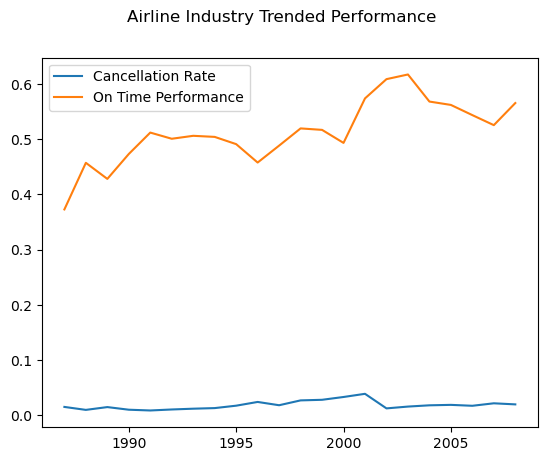

In [42]:
import matplotlib.pyplot as plt

#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

fig, ax = plt.subplots()
ax.plot(late_flights_by_year_pd["Year"], late_flights_by_year_pd["cancel_rate"], label = "Cancellation Rate")
ax.plot(late_flights_by_year_pd["Year"], 1-late_flights_by_year_pd["on_time_performance"], label = "On Time Performance")
ax.legend()
fig.suptitle('Airline Industry Trended Performance')
plt.show()

On time performance is consistently poor but trended upwards over time. Cancel rates have remained relatively constant with some deterioration in the late 90s and early 2000s.

Next, a crude notion of industry concentration will be developed by looking at the total number of flights by airline over time.

In [43]:
import pyspark.sql.functions as f

carriers = spark.sql("""

Select 

d.Year,
count(distinct d.UniqueCarrier) as unique_carriers

from df as d 

Group by 1
order by 1 asc 

""")

carriers.show()

+----+---------------+
|Year|unique_carriers|
+----+---------------+
|1987|             14|
|1988|             14|
|1989|             13|
|1990|             12|
|1991|             12|
|1992|             10|
|1993|             10|
|1994|             10|
|1995|             10|
|1996|             10|
|1997|             10|
|1998|             10|
|1999|             10|
|2000|             11|
|2001|             12|
|2002|             10|
|2003|             18|
|2004|             19|
|2005|             20|
|2006|             20|
+----+---------------+
only showing top 20 rows



In [44]:
carriers = carriers.toPandas()
carriers

,Year,unique_carriers
0,1987,14
1,1988,14
2,1989,13
3,1990,12
4,1991,12
5,1992,10
6,1993,10
7,1994,10
8,1995,10
9,1996,10


Text(0.5, 1.0, 'Unique Carriers by Year')

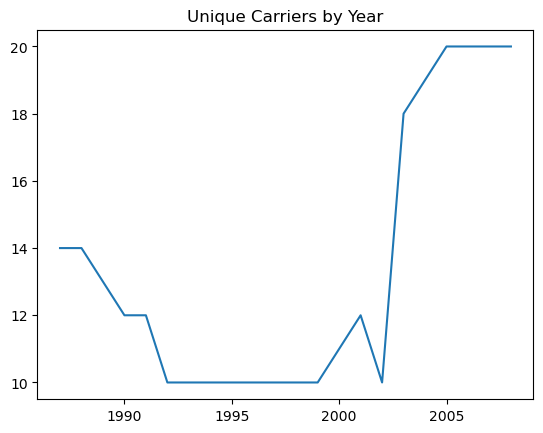

In [45]:
plt.plot(carriers['Year'], carriers["unique_carriers"])
plt.title("Unique Carriers by Year")

Intriguingly enough, there was a brief period of apparent industry consolidation in the airline industry. The trough was 10 carriers, down from 14 in 1987. By the end of the series there are 20 carriers - more than there were at the start of it. Industry level competition seems like an unlikely explanation for any sort of performance trend - which as demonstrated above is overall upward.

Next, let's look at whether there are any troublesome routes. To do this, origin and destination ordered pairs will be created and on time performance computed on those ordered pairs. A histogram plot will then be created to examine the central tendency of the distribution visually.

In [46]:
import pyspark.sql.functions as f

tough_routes = spark.sql("""

Select 

d.Origin, 
d.Dest, 
sum(d.Cancelled) / count(*) as cancel_rate,
sum(case when d.LateArrival is True then 1 else 0 end) / count(d.LateArrival) as on_time_performance,
count(*) as sample

from df as d 

Group by 1,2
Order by on_time_performance asc 

""")

tough_routes.show()

+------+----+-----------+-------------------+------+
|Origin|Dest|cancel_rate|on_time_performance|sample|
+------+----+-----------+-------------------+------+
|   ABQ| GJT|        0.0|               null|     7|
|   BWI| GRR|        0.0|               null|     2|
|   FAT| SNA|        0.0|               null|     1|
|   GEG| TWF|        0.0|               null|     4|
|   SFO| TWF|        0.0|               null|    22|
|   BIL| CPR|        0.0|               null|     1|
|   WYS| IDA|        0.0|               null|     1|
|   MKE| ROA|        0.0|               null|     2|
|   MSO| GJT|        0.0|               null|     6|
|   RAP| PIH|        0.0|               null|     2|
|   ISP| AGS|        0.0|               null|     1|
|   GJT| COS|        0.0|               null|     7|
|   PNS| MCN|        0.0|               null|     1|
|   LNK| GJT|        0.0|               null|     2|
|   ABE| ROC|        0.0|               null|     1|
|   CLD| ONT|        0.0|               null| 

In [47]:
tough_routes = tough_routes.toPandas()
tough_routes.head()

,Origin,Dest,cancel_rate,on_time_performance,sample
0,CLD,ONT,0.0,NaN,2
1,COD,PIH,0.0,NaN,2
2,EUG,TWF,0.0,NaN,5
3,FSD,SBN,0.0,NaN,1
4,MSN,MLI,0.0,NaN,1


In [48]:
tough_routes = tough_routes.dropna()
tough_routes = tough_routes[tough_routes['sample'] > 30]

Evidently, there were indeed some routes that were chronically late. However, lateness seems to have strong central tendency - suggesting that this is really an industry level problem.

(array([  28.,  138.,  506., 1559., 2990., 1402.,  237.,   65.,   44.,
          16.]),
 array([0.03067485, 0.12760736, 0.22453988, 0.32147239, 0.41840491,
        0.51533742, 0.61226994, 0.70920245, 0.80613497, 0.90306748,
        1.        ]),
 <BarContainer object of 10 artists>)

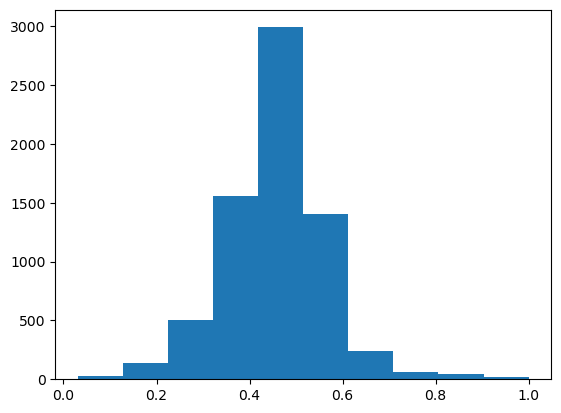

In [49]:
import numpy as np
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
counts, bins = np.histogram(tough_routes['on_time_performance'])
plt.hist(bins[:-1], bins, weights=counts)

Last, a similar histogram will be done to look at airplane management by tail number.

In [50]:
import pyspark.sql.functions as f

bad_planes = spark.sql("""

Select 

d.TailNum, 
sum(d.Cancelled) / count(*) as cancel_rate,
sum(case when d.LateArrival is True then 1 else 0 end) / count(d.LateArrival) as on_time_performance,
count(*) as sample

from df as d 

Group by 1
Order by on_time_performance asc 

""")

In [51]:
bad_planes = bad_planes.toPandas()
bad_planes

,TailNum,cancel_rate,on_time_performance,sample
0,000000,1.0,NaN,55349
1,N703AW,1.0,NaN,14
2,N850BR,1.0,NaN,3
3,N292BR,1.0,NaN,1
4,N239BR,1.0,NaN,1
...,...,...,...,...
13145,N906S,0.0,1.0,1
13146,N432AW,0.5,1.0,4
13147,N668��,0.0,1.0,1
13148,NCHD,0.0,1.0,2


In [52]:
bad_planes = bad_planes.dropna()
bad_planes = bad_planes[bad_planes['sample'] > 30]

(array([  34.,  131., 1814., 5485., 4120.,  984.,  291.,   80.,   15.,
           6.]),
 array([0.15279938, 0.23011203, 0.30742469, 0.38473734, 0.46205   ,
        0.53936265, 0.61667531, 0.69398796, 0.77130062, 0.84861327,
        0.92592593]),
 <BarContainer object of 10 artists>)

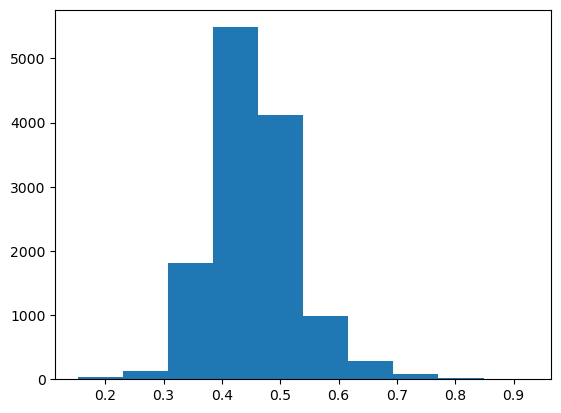

In [53]:
import numpy as np
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
counts, bins = np.histogram(bad_planes['on_time_performance'])
plt.hist(bins[:-1], bins, weights=counts)

In [54]:
end_data_visualizations = datetime.now()

From the above, we can see that there are indeed some planes that are chronically late. To the extent to which they are merely on some of the late routes is a good follow up question. However, this also shows predictably strong central tendency as well - which it would have to in aggregate given the size of the problem and the prior results.

In [55]:
delta =  end_data_visualizations - start_data_visualizations
visualization_total_time = delta.total_seconds()
print('difference in seconds is:', visualization_total_time)

difference in seconds is: 587.266731


# Analysis

Now that I've had the chance to see the basic descriptive statistics, a few conclusions jump out:

(1) The airline industry has consistently struggled with on time performance issues - with almost half of flights being late; \
(2) Cancellations increased during the 1990s and then dropped back to longer term trends in the early 2000s; \
(3) There are some troublesome routes and planes but these appear to be industry level problems ; \
(4) A lack of competition was not an obvious driver of quality issues ;

There aren't any obvious structural explanations for airline lateness. How well do the other measurement parameters explain on time performance? With this step of the problem, I will utilize the late minutes themselves as the dependent variable instead of the boolean.

# Machine Learning on Late Minutes


For the purposes of this demonstration, I'll work with just the quantitative variables for the non cancelled flights to fit a regression. The variables chosen for this demonstration are as follows:

1   ArrDelay
2	AirTime	in minutes \
3	ArrDelay	arrival delay, in minutes \
4	Distance	in miles \
5	TaxiIn	taxi in time, in minutes \
6	TaxiOut	taxi out time in minutes \
7	CarrierDelay	in minutes \
8	WeatherDelay	in minutes \
9	NASDelay	in minutes \
10	SecurityDelay	in minutes \
11	LateAircraftDelay	in minutes

In [56]:
ml_model_start = datetime.now()

In [57]:
import pyspark.sql.functions as f

model_df = spark.sql("""

Select 
ArrDelay,
AirTime,
Distance,
TaxiIn,
TaxiOut,

case when CarrierDelay <> 'NA' then CarrierDelay else 0 end as CarrierDelay,
case when WeatherDelay <> 'NA' then WeatherDelay else 0 end as WeatherDelay,
case when NASDelay <> 'NA' then NASDelay else 0 end as NASDelay,
case when SecurityDelay <> 'NA' then SecurityDelay else 0 end as SecurityDelay,
case when LateAircraftDelay <> 'NA' then LateAircraftDelay else 0 end as LateAircraftDelay

from df as d
where d.Cancelled = 0
and d.AirTime is not null

""")

In [58]:
model_df.show(15)

+--------+-------+--------+------+-------+------------+------------+--------+-------------+-----------------+
|ArrDelay|AirTime|Distance|TaxiIn|TaxiOut|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+--------+-------+--------+------+-------+------------+------------+--------+-------------+-----------------+
|      -8|     32|     205|     7|     14|           0|           0|       0|            0|                0|
|     -11|    155|    1072|     2|      7|           0|           0|       0|            0|                0|
|       2|     29|     116|     3|     13|           0|           0|       0|            0|                0|
|       2|     37|     156|     6|      6|           0|           0|       0|            0|                0|
|      -3|     40|     140|     7|     14|           0|           0|       0|            0|                0|
|     -19|    126|     903|    14|     10|           0|           0|       0|            0|                0|
|      -5|

Doing that step of the pipeline created some unintended consequences. All numbers will be treated as floats for the purposes of the machine learning study:

In [59]:
model_df.printSchema()

root
 |-- ArrDelay: integer (nullable = true)
 |-- AirTime: integer (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- CarrierDelay: string (nullable = true)
 |-- WeatherDelay: string (nullable = true)
 |-- NASDelay: string (nullable = true)
 |-- SecurityDelay: string (nullable = true)
 |-- LateAircraftDelay: string (nullable = true)



In [60]:
model_df = model_df.withColumn("ArrDelay",model_df.ArrDelay.cast(FloatType()))
model_df = model_df.withColumn("AirTime",model_df.AirTime.cast(FloatType()))
model_df = model_df.withColumn("Distance",model_df.Distance.cast(FloatType()))
model_df = model_df.withColumn("TaxiIn",model_df.TaxiIn.cast(FloatType()))
model_df = model_df.withColumn("TaxiOut",model_df.TaxiOut.cast(FloatType()))
model_df = model_df.withColumn("CarrierDelay",model_df.CarrierDelay.cast(FloatType()))
model_df = model_df.withColumn("WeatherDelay",model_df.WeatherDelay.cast(FloatType()))
model_df = model_df.withColumn("NASDelay",model_df.NASDelay.cast(FloatType()))
model_df = model_df.withColumn("SecurityDelay",model_df.SecurityDelay.cast(FloatType()))
model_df = model_df.withColumn("LateAircraftDelay",model_df.LateAircraftDelay.cast(FloatType()))

In [61]:
#https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.dropna.html
model_df = model_df.na.drop()

For our purposes, a basic multiple linear regression should be a reasonable goodness of fit test for whether the data being collected over many decades explains the dependent variable of late minutes well. Other more elaborate algorithms were explored as part of this exercise, but there was not sufficient time to work out the issues with Spark RAPIDS.

In [62]:
from pyspark.ml.feature import VectorAssembler
label_name = "ArrDelay"
feature_names = [x.name for x in model_df.schema if x.name != label_name]
vectorAssembler = VectorAssembler(inputCols = feature_names, outputCol = 'features')
model_df = vectorAssembler.transform(model_df)

In [63]:
splits = model_df.randomSplit([0.3, 0.05])
train_df = splits[0]
test_df = splits[1]

In [64]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='ArrDelay', maxIter=20, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.05061899689132458,-0.007470617603056764,0.05408647612950216,0.5654554841366084,0.9522513546856026,0.9068279207125872,0.7554208360736364,0.6299765109625814,0.9545398662280121]
Intercept: -6.26954586114604


In [65]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 23.287664
r2: 0.512768


# Regression analysis results

While I would say that the regression performance is hardly conclusive, based on the lack of the usual diagnostic plots as well as other modeling attempts, it does seem like the variables chosen should have been able to easily explain on time performance. At a minimum, the idea that the wrong data points have been tracked for an extended period seems like a strong possibility.

# XGBoost rapids - failed test

I could not get this to work due to issues with Java. However, I will come back to this at a later date.

XGBoost now includes some documentation around GPUs in its section on Spark on its web site: https://xgboost.readthedocs.io/en/stable/tutorials/spark_estimator.html 

There is a very convenient template available for this type of problem. However, I would note that it does not work with a GPU unless specifically told to do so via the use_GPU=True command. It's not clear if this is common type of requirement for Spark applications. In any case, the coding burden is relatively minimal.

I would also note that running this project also requires taking the availability of a GPU into consideration at the environment level. In the docs, it talks about which commands to use to install the xgboost package to use the GPU vs the CPU: https://xgboost.readthedocs.io/en/stable/install.html#conda 

I utilized the py-xgboost package from conda-forge: 

conda install -c conda-forge py-xgboost

https://xgboost.readthedocs.io/en/stable/tutorials/spark_estimator.html
from xgboost.spark import SparkXGBRegressor
spark = SparkSession.builder.getOrCreate()

label_name = "ArrDelay"

create a xgboost pyspark regressor estimator and set use_gpu=True
regressor = SparkXGBRegressor(
  features_col="features",
  label_col=label_name,
  num_workers=4,
  use_gpu=False,
 handleInvalid = "skip"
)

train and return the model
model = regressor.fit(train_df)

predict on test data
predict_df = model.transform(test_df)
predict_df.show()

XGBoost now includes some documentation around GPUs in its section on Spark on its web site: https://xgboost.readthedocs.io/en/stable/tutorials/spark_estimator.html 

There is a very convenient template available for this type of problem. However, I would note that it does not work with a GPU unless specifically told to do so via the use_GPU=True command. It's not clear if this is common type of requirement for Spark applications. In any case, the coding burden is relatively minimal.

I would also note that running this project also requires taking the availability of a GPU into consideration at the environment level. In the docs, it talks about which commands to use to install the xgboost package to use the GPU vs the CPU: https://xgboost.readthedocs.io/en/stable/install.html#conda 

I utilized the py-xgboost package from conda-forge: 

conda install -c conda-forge py-xgboost

# Conclusion of real world performance test

In [66]:
ml_model_end = datetime.now()

delta =  ml_model_end - ml_model_start
ml_model_total_time = delta.total_seconds()
print('difference in seconds is:', ml_model_total_time)

difference in seconds is: 679.391858


In [67]:
end_notebook_preprocessing = datetime.now()

delta =  end_notebook_preprocessing - start_notebook_preprocessing

notebook_total_processing_time = delta.total_seconds()
print('difference in seconds is:', notebook_total_processing_time)

difference in seconds is: 2155.074357


Next, I gather up all of the time performance into a single dataframe for export for later comparison:

In [68]:
# switch to report CPU vs GPU runtimes
if cp_u is True:
    processing_env = 'CPU' 
else: 
    processing_env = 'GPU' 

In [69]:
export_string = processing_env+"runtime.csv"
export_string

'GPUruntime.csv'

In [70]:
import pandas as pd
performance = [notebook_total_processing_time, preprocessing_total_time, visualization_total_time ,ml_model_total_time ]
performance_labels = ['Notebook Total Processing Time', 'Preprocessing Time', 'Visualization Time', 'Machine Learning Time']
runtime_env_name = [processing_env, processing_env, processing_env, processing_env, processing_env]
export_df = pd.DataFrame(list(zip(runtime_env_name,performance_labels, performance )), columns=['Runtime','Stage','Seconds'])

In [71]:
export_df

,Runtime,Stage,Seconds
0,GPU,Notebook Total Processing Time,2155.074357
1,GPU,Preprocessing Time,888.371139
2,GPU,Visualization Time,587.266731
3,GPU,Machine Learning Time,679.391858


In [72]:
export_df.to_csv(export_string)

In [73]:
!jupyter nbconvert e63_brzozowski_adam_final_project.ipynb --to html

[NbConvertApp] Converting notebook e63_brzozowski_adam_final_project.ipynb to html
[NbConvertApp] Writing 1234345 bytes to e63_brzozowski_adam_final_project.html
